<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [17]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [19]:
## Write your code here
print(df.columns)
print(df.dtypes)
print(df.describe())


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147     

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [28]:
print(df.isnull().sum())

# Fill missing values in 'RemoteWork' with the mode (most frequent value)
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(round(df['ConvertedCompYearly'].mean()))
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mean())
df['JobSat']

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 0
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly        0
JobSat                     0
Length: 114, dtype: int64


0        8.000000
1        6.935077
2        6.935077
3        6.935077
4        6.935077
           ...   
65432    6.935077
65433    6.935077
65434    6.935077
65435    6.935077
65436    6.935077
Name: JobSat, Length: 65437, dtype: float64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [32]:
## Write your code here
print(df['Employment'].value_counts())
print(df['JobSat'].value_counts())
print(df['YearsCodePro'].value_counts())

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


<Axes: xlabel='JobSat', ylabel='Density'>

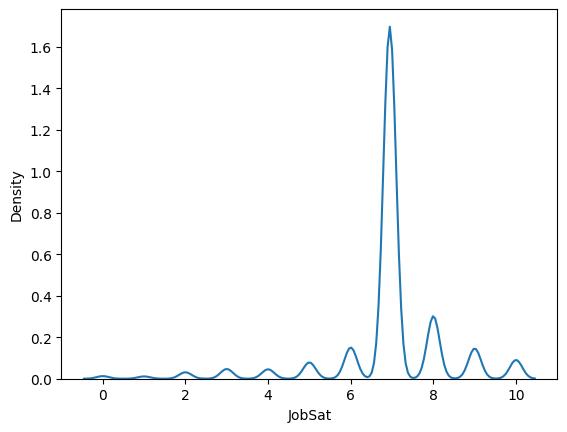

In [33]:
## Write your code here
sns.kdeplot(data=df, x='JobSat')
#The plot shows that on average people have a mediocre job satisfaction'

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Example: assuming df is your DataFrame

# Split languages and explode into separate rows
worked_with = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
want_to_work_with = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

# Count frequencies
worked_counts = worked_with.value_counts()
want_counts = want_to_work_with.value_counts()

# Get sets of unique languages
worked_set = set(worked_counts.index)
want_set = set(want_counts.index)

# Plot Venn diagram showing overlap
plt.figure(figsize=(8,6))
venn2([worked_set, want_set], set_labels=('Have Worked With', 'Want to Work With'))
plt.title('Overlap of Programming Languages')
plt.show()

<Axes: xlabel='LanguageHaveWorkedWith', ylabel='LanguageWantToWorkWith'>

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation of RemoteWork by Region
remote_region_ct = pd.crosstab(df['Region'], df['RemoteWork'])

# Display the first few rows to verify
print(remote_region_ct.head())
# Plot grouped bar chart
remote_region_ct.plot(kind='bar', figsize=(12,6))

plt.title('Distribution of Remote Work by Region')
plt.xlabel('Region')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Status')
plt.tight_layout()
plt.show()
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(remote_region_ct, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Remote Work Distribution by Region')
plt.xlabel('Remote Work Status')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [ ]:
## Write your code here
import pandas as pd
import numpy as np

# Drop rows with missing values in these columns
df_clean = df[['JobSat', 'YearsCodePro']].dropna()

# Convert 'YearsCodePro' to numeric (handle non-numeric like 'Less than 1 year', 'More than 50 years')
def convert_years(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return np.nan

df_clean['YearsCodePro'] = df_clean['YearsCodePro'].apply(convert_years)

# Drop any rows where conversion failed
df_clean = df_clean.dropna()
from scipy.stats import pearsonr, spearmanr

# Pearson correlation
pearson_corr, pearson_p = pearsonr(df_clean['YearsCodePro'], df_clean['JobSat'])
print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3e}")

# Spearman correlation
spearman_corr, spearman_p = spearmanr(df_clean['YearsCodePro'], df_clean['JobSat'])
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3e}")

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [ ]:
## Write your code here
EmEdCross = pd.crosstab(df['Employment'],df['EdLevel'])
EmEdCross.plot(kind='bar')
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('Modified.csv',index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
